<h1>Task-1:Predicting Percentage of student by number of study hours</h1>

<h3>Importing Libraries</h3>

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)
print("File imported successfully")

File imported successfully


In [25]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [26]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [28]:
df.shape

(25, 2)

In [29]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<h3>2-D plot</h3>

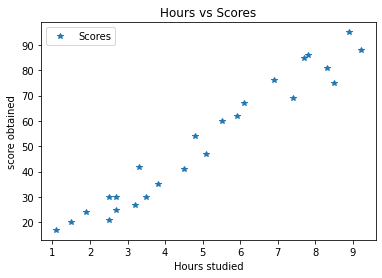

In [30]:
df.plot(x="Hours",y="Scores",style="*")
plt.title("Hours vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("score obtained")
plt.show()

<h3>Preparing the data</h3>

In [31]:
X=df.iloc[:, :-1].values
Y=df.iloc[:,1].values

<h3>Split this data into training and test sets.</h3> 

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

<h3>Training the Algorithm</h3>

In [33]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
print(regressor.intercept_)

[ 4.97814541  3.41990099  4.0866161   3.20218707  3.78606212  2.05036073
  1.3437775   2.56492544  0.7331275   1.0404248   0.31212579 -0.35897467
 -4.3839532  -1.37241811 -3.88087414 -2.62948809 -2.81484226 -6.53769584
 -5.53940715]


In [35]:
print(regressor.coef_)

[[-1.25502157]
 [-0.6851578 ]
 [-0.90771138]
 [-0.61832868]
 [-0.58535158]
 [-0.30612722]
 [-0.14433522]
 [-0.43743096]
 [-0.01910059]
 [-0.08059841]
 [ 0.06068054]
 [ 0.17875716]
 [ 0.75842029]
 [ 0.34112047]
 [ 0.6928058 ]
 [ 0.52408342]
 [ 0.54956635]
 [ 1.0286624 ]
 [ 0.90506699]]


<h3>To Make Prediction on test data</h3>

In [36]:
y_pred=regressor.predict(x_test)

<h3>Comparing the actual output values for X_test with the predicted values, execute the following script:</h3>

In [37]:
dataset=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dataset

,Actual,Predicted
0,20,17
1,27,30
2,69,86
3,30,30
4,62,67


<h3>Let's find the values for these metrics using our test data.</h3>

In [38]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.6
Mean Squared Error: 66.4
Root Mean Squared Error: 8.148619514985345


<h3>You can see that the value of root mean squared error is 8.14, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.</h3>